<a href="https://colab.research.google.com/github/jiw3026/analy/blob/main/%EC%97%B0%EA%B4%80%EB%B6%84%EC%84%9D.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install mlxtend

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import pandas as pd
from mlxtend.preprocessing import TransactionEncoder
from mlxtend.frequent_patterns import apriori,association_rules

In [ ]:
df = pd.read_csv('/content/drive/preprocessing.csv')

In [ ]:
df

,Unnamed: 0,P1,P3,P4,P5,P6,B165,B166,C1,E1,...,제조업,자동차,자동차유지비,연료/가스비,수제용품점,기타,전체금액,자전거,age,bank
0,0,0,1,1,0,0,0,0,210,0,...,0,0,70000,76000,0,0,4350000,0,20,0
1,1,0,1,0,0,0,0,0,40,0,...,0,0,0,0,0,1000,580000,0,50,0
2,2,0,1,1,0,0,0,0,50,0,...,0,0,0,129000,0,0,1950000,0,40,0
3,3,1,1,1,0,0,0,0,50,0,...,0,0,0,0,0,0,43000000,0,60,0
4,4,0,0,1,0,0,0,0,40,0,...,0,0,20000,0,0,0,4910000,0,30,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
473224,473224,1,0,1,0,1,0,0,30,111111111111,...,0,0,0,0,0,0,650000,0,40,1
473225,473225,0,1,1,0,0,0,0,50,0,...,0,0,0,0,0,0,4790000,0,20,0
473226,473226,1,1,1,1,0,0,0,60,0,...,0,0,95000,0,0,7000,1650000,0,40,1
473227,473227,0,1,1,1,0,0,0,50,0,...,0,0,0,14000,0,0,1340000,0,60,0


In [ ]:
df.drop(columns='Unnamed: 0',inplace = True)

KeyError: ignored

In [ ]:
df2 = df[['수제용품점','연료/가스비','자동차유지비','자동차','제조업','의료','오락','법률업','장례업','예식업','보험','취미/문화','귀금속/악세서리','통신요금','사무/통신기기','중고품 판매점','가구/전자제품','요식업','결제대행','농수산물','잡화및쇼핑','세금','여행업','숙박업','의류']]

In [ ]:
df2

,수제용품점,연료/가스비,자동차유지비,자동차,제조업,의료,오락,법률업,장례업,예식업,...,중고품 판매점,가구/전자제품,요식업,결제대행,농수산물,잡화및쇼핑,세금,여행업,숙박업,의류
0,0,76000,70000,0,0,31000,0,0,0,0,...,0,0,1173000,899000,0,386000,0,496000,190000,348000
1,0,0,0,0,0,0,0,0,0,0,...,0,0,188000,152000,0,159000,0,0,0,0
2,0,129000,0,0,0,260000,0,0,0,300000,...,0,0,112000,0,0,296000,0,1000,0,9000
3,0,0,0,0,0,0,0,0,0,0,...,0,0,14000,0,0,0,42985000,0,0,0
4,0,0,20000,0,0,0,0,0,0,0,...,0,0,0,3947000,0,0,15000,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
473224,0,0,0,0,0,0,0,0,0,0,...,0,0,6000,366000,0,3000,0,0,0,0
473225,0,0,0,0,0,82000,0,0,0,0,...,0,0,126000,54000,0,125000,0,156000,0,0
473226,0,0,95000,0,0,0,0,0,0,0,...,0,0,253000,643000,0,152000,53000,37000,0,0
473227,0,14000,0,0,0,0,0,0,0,0,...,0,82000,193000,577000,0,36000,0,0,0,0


In [ ]:
df2.loc[df2['연료/가스비']!=0,'연료/가스비'] = True
df2.loc[df2['연료/가스비']==0,'연료/가스비'] = False

/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1817: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value, pi)


In [ ]:
df2

,수제용품점,연료/가스비,자동차유지비,자동차,제조업,의료,오락,법률업,장례업,예식업,...,중고품 판매점,가구/전자제품,요식업,결제대행,농수산물,잡화및쇼핑,세금,여행업,숙박업,의류
0,0,True,70000,0,0,31000,0,0,0,0,...,0,0,1173000,899000,0,386000,0,496000,190000,348000
1,0,False,0,0,0,0,0,0,0,0,...,0,0,188000,152000,0,159000,0,0,0,0
2,0,True,0,0,0,260000,0,0,0,300000,...,0,0,112000,0,0,296000,0,1000,0,9000
3,0,False,0,0,0,0,0,0,0,0,...,0,0,14000,0,0,0,42985000,0,0,0
4,0,False,20000,0,0,0,0,0,0,0,...,0,0,0,3947000,0,0,15000,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
473224,0,False,0,0,0,0,0,0,0,0,...,0,0,6000,366000,0,3000,0,0,0,0
473225,0,False,0,0,0,82000,0,0,0,0,...,0,0,126000,54000,0,125000,0,156000,0,0
473226,0,False,95000,0,0,0,0,0,0,0,...,0,0,253000,643000,0,152000,53000,37000,0,0
473227,0,True,0,0,0,0,0,0,0,0,...,0,82000,193000,577000,0,36000,0,0,0,0


In [ ]:
df2.loc[df2['수제용품점']!=0,'수제용품점'] = True
df2.loc[df2['수제용품점']==0,'수제용품점'] = False

df2.loc[df2['자동차유지비']!=0,'자동차유지비'] = True
df2.loc[df2['자동차유지비']==0,'자동차유지비'] = False

df2.loc[df2['자동차']!=0,'자동차'] = True
df2.loc[df2['자동차']==0,'자동차'] = False

df2.loc[df2['제조업']!=0,'제조업'] = True
df2.loc[df2['제조업']==0,'제조업'] = False

df2.loc[df2['의료']!=0,'의료'] = True
df2.loc[df2['의료']==0,'의료'] = False

df2.loc[df2['오락']!=0,'오락'] = True
df2.loc[df2['오락']==0,'오락'] = False

df2.loc[df2['법률업']!=0,'법률업'] = True
df2.loc[df2['법률업']==0,'법률업'] = False

df2.loc[df2['장례업']!=0,'장례업'] = True
df2.loc[df2['장례업']==0,'장례업'] = False

df2.loc[df2['예식업']!=0,'예식업'] = True
df2.loc[df2['예식업']==0,'예식업'] = False

df2.loc[df2['보험']!=0,'보험'] = True
df2.loc[df2['보험']==0,'보험'] = False

# df2.loc[df2['학업']!=0,'학업'] = True
# df2.loc[df2['학업']==0,'학업'] = False

df2.loc[df2['취미/문화']!=0,'취미/문화'] = True
df2.loc[df2['취미/문화']==0,'취미/문화'] = False

df2.loc[df2['귀금속/악세서리']!=0,'귀금속/악세서리'] = True
df2.loc[df2['귀금속/악세서리']==0,'귀금속/악세서리'] = False

df2.loc[df2['의류']!=0,'의류'] = True
df2.loc[df2['의류']==0,'의류'] = False

df2.loc[df2['통신요금']!=0,'통신요금'] = True
df2.loc[df2['통신요금']==0,'통신요금'] = False

df2.loc[df2['사무/통신기기']!=0,'사무/통신기기'] = True
df2.loc[df2['사무/통신기기']==0,'사무/통신기기'] = False

df2.loc[df2['중고품 판매점']!=0,'중고품 판매점'] = True
df2.loc[df2['중고품 판매점']==0,'중고품 판매점'] = False

df2.loc[df2['가구/전자제품']!=0,'가구/전자제품'] = True
df2.loc[df2['가구/전자제품']==0,'가구/전자제품'] = False

df2.loc[df2['요식업']!=0,'요식업'] = True
df2.loc[df2['요식업']==0,'요식업'] = False

df2.loc[df2['결제대행']!=0,'결제대행'] = True
df2.loc[df2['결제대행']==0,'결제대행'] = False

df2.loc[df2['농수산물']!=0,'농수산물'] = True
df2.loc[df2['농수산물']==0,'농수산물'] = False

df2.loc[df2['잡화및쇼핑']!=0,'잡화및쇼핑'] = True
df2.loc[df2['잡화및쇼핑']==0,'잡화및쇼핑'] = False


df2.loc[df2['세금']!=0,'세금'] = True
df2.loc[df2['세금']==0,'세금'] = False

df2.loc[df2['여행업']!=0,'여행업'] = True
df2.loc[df2['여행업']==0,'여행업'] = False

df2.loc[df2['숙박업']!=0,'숙박업'] = True
df2.loc[df2['숙박업']==0,'숙박업'] = False

/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1817: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value, pi)


# 새 섹션

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
df2['학업']=df['학업']

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [ ]:
df2.loc[df2['학업']!=0,'학업'] = True
df2.loc[df2['학업']==0,'학업'] = False

/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1817: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value, pi)


In [ ]:
df2

,수제용품점,연료/가스비,자동차유지비,자동차,제조업,의료,오락,법률업,장례업,예식업,...,가구/전자제품,요식업,결제대행,농수산물,잡화및쇼핑,세금,여행업,숙박업,의류,학업
0,False,True,True,False,False,True,False,False,False,False,...,False,True,True,False,True,False,True,True,True,0
1,False,False,False,False,False,False,False,False,False,False,...,False,True,True,False,True,False,False,False,False,0
2,False,True,False,False,False,True,False,False,False,True,...,False,True,False,False,True,False,True,False,True,523000
3,False,False,False,False,False,False,False,False,False,False,...,False,True,False,False,False,True,False,False,False,0
4,False,False,True,False,False,False,False,False,False,False,...,False,False,True,False,False,True,False,False,False,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
473224,False,False,False,False,False,False,False,False,False,False,...,False,True,True,False,True,False,False,False,False,0
473225,False,False,False,False,False,True,False,False,False,False,...,False,True,True,False,True,False,True,False,False,0
473226,False,False,True,False,False,False,False,False,False,False,...,False,True,True,False,True,True,True,False,False,0
473227,False,True,False,False,False,False,False,False,False,False,...,True,True,True,False,True,False,False,False,False,0


In [ ]:
frequent_itemsets = apriori(df2, min_support=0.5, use_colnames=True)

In [ ]:
frequent_itemsets

,support,itemsets
0,0.521885,(자동차유지비)
1,0.571835,(의료)
2,0.511923,(통신요금)
3,0.880882,(요식업)
4,0.675905,(결제대행)
5,0.913239,(잡화및쇼핑)
6,0.544907,"(의료, 요식업)"
7,0.558045,"(잡화및쇼핑, 의료)"
8,0.615279,"(요식업, 결제대행)"
9,0.856695,"(잡화및쇼핑, 요식업)"


In [ ]:
association_rules(frequent_itemsets, metric="lift", min_threshold=1)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(의료),(요식업),0.571835,0.880882,0.544907,0.952910,1.081768,0.041188,2.529573
1,(요식업),(의료),0.880882,0.571835,0.544907,0.618593,1.081768,0.041188,1.122593
2,(잡화및쇼핑),(의료),0.913239,0.571835,0.558045,0.611061,1.068597,0.035823,1.100854
3,(의료),(잡화및쇼핑),0.571835,0.913239,0.558045,0.975884,1.068597,0.035823,3.597672
4,(요식업),(결제대행),0.880882,0.675905,0.615279,0.698481,1.033400,0.019886,1.074872
5,(결제대행),(요식업),0.675905,0.880882,0.615279,0.910304,1.033400,0.019886,1.328016
6,(잡화및쇼핑),(요식업),0.913239,0.880882,0.856695,0.938085,1.064938,0.052240,1.923883
7,(요식업),(잡화및쇼핑),0.880882,0.913239,0.856695,0.972542,1.064938,0.052240,3.159817
8,(잡화및쇼핑),(결제대행),0.913239,0.675905,0.636449,0.696914,1.031082,0.019186,1.069316
9,(결제대행),(잡화및쇼핑),0.675905,0.913239,0.636449,0.941624,1.031082,0.019186,1.486253


In [ ]:
apriori(df2, min_support=0.4, use_colnames=True)

,support,itemsets
0,0.521885,(자동차유지비)
1,0.571835,(의료)
2,0.482335,(취미/문화)
3,0.511923,(통신요금)
4,0.402285,(사무/통신기기)
5,0.880882,(요식업)
6,0.675905,(결제대행)
7,0.913239,(잡화및쇼핑)
8,0.482323,"(자동차유지비, 요식업)"
9,0.492428,"(자동차유지비, 잡화및쇼핑)"


In [ ]:
re_df=pd.read_csv('/content/drive/MyDrive/신박해커톤/data_045.csv' ,encoding = 'cp949')

In [ ]:
re_df

,P1,P2,P3,P4,P5,P6,P7,B1,B2,B3,...,B165,B166,B167,C1,E1,E2,E3,E4,E5,E6
0,M,20대_후,1,1,0,0,A은행,0,0,0,...,0,0,4350000,210,0,0,11111111110,0,111111111111,1100000000
1,M,50대_후,1,0,0,0,A은행,0,0,0,...,0,0,580000,40,0,0,0,0,111110111111,10000000000
2,M,40대_후,1,1,0,0,A은행,0,0,0,...,0,0,1950000,50,0,1101101111,0,0,111101101111,101101101111
3,F,60대_초,1,1,0,0,A은행,0,0,0,...,0,0,43000000,50,0,0,0,0,111111111111,111111111111
4,M,30대_후,0,1,0,0,B은행,0,0,0,...,0,0,4910000,40,0,111111111111,0,0,111111111111,111111111111
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
473224,F,40대_초,0,1,0,1,B은행,0,0,0,...,0,0,650000,30,111111111111,10001001100,0,0,111111111101,10111111100
473225,M,20대_후,1,1,0,0,A은행,0,0,0,...,0,0,4790000,50,0,110110000000,0,0,111111111110,111111111000
473226,F,40대_후,1,1,1,0,B은행,0,0,0,...,0,0,1650000,60,0,100100011,0,0,111111111111,111111111111
473227,M,60대_후,1,1,1,0,A은행,0,0,0,...,0,0,1340000,50,0,100101000,0,0,111111111111,110101111111


In [ ]:
Bdata = pd.DataFrame()
for i in range(1,167):
  Bdata['B'+str(i)]=re_df['B'+str(i)]

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  This is separate from the ipykernel package so we can avoid doing imports until


In [ ]:
Bdata

,B1,B2,B3,B4,B5,B6,B7,B8,B9,B10,...,B157,B158,B159,B160,B161,B162,B163,B164,B165,B166
0,0,0,0,0,190000,0,101000,0,54000,0,...,0,0,0,0,70000,76000,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,1000,0,0,...,0,0,0,0,0,110000,0,19000,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,20000,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
473224,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
473225,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
473226,0,0,0,0,0,0,0,27000,0,0,...,0,0,0,0,95000,0,0,0,0,0
473227,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,14000,0,0


In [ ]:
for i in range(1,167):
  Bdata.loc[Bdata['B'+str(i)]!=0,'B'+str(i)] = True
  Bdata.loc[Bdata['B'+str(i)]==0,'B'+str(i)] = False


In [ ]:
Bdata

,B1,B2,B3,B4,B5,B6,B7,B8,B9,B10,...,B157,B158,B159,B160,B161,B162,B163,B164,B165,B166
0,False,False,False,False,True,False,True,False,True,False,...,False,False,False,False,True,True,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,True,False,False,...,False,False,False,False,False,True,False,True,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,True,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
473224,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
473225,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
473226,False,False,False,False,False,False,False,True,False,False,...,False,False,False,False,True,False,False,False,False,False
473227,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,True,False,False


In [ ]:
Bdata_frequent_itemsets = apriori(Bdata, min_support=0.5, use_colnames=True)

In [ ]:
Bdata_frequent_itemsets

,support,itemsets
0,0.751997,(B15)
1,0.721146,(B17)
2,0.523381,(B33)
3,0.568596,(B34)
4,0.724385,(B35)
5,0.714183,(B41)
6,0.50614,(B61)
7,0.58736,"(B15, B17)"
8,0.599116,"(B35, B15)"
9,0.588867,"(B41, B15)"


In [ ]:
df

,P1,P3,P4,P5,P6,B165,B166,C1,E1,E2,...,제조업,자동차,자동차유지비,연료/가스비,수제용품점,기타,전체금액,자전거,age,bank
0,0,1,1,0,0,0,0,210,0,0,...,0,0,70000,76000,0,0,4350000,0,20,0
1,0,1,0,0,0,0,0,40,0,0,...,0,0,0,0,0,1000,580000,0,50,0
2,0,1,1,0,0,0,0,50,0,1101101111,...,0,0,0,129000,0,0,1950000,0,40,0
3,1,1,1,0,0,0,0,50,0,0,...,0,0,0,0,0,0,43000000,0,60,0
4,0,0,1,0,0,0,0,40,0,111111111111,...,0,0,20000,0,0,0,4910000,0,30,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
473224,1,0,1,0,1,0,0,30,111111111111,10001001100,...,0,0,0,0,0,0,650000,0,40,1
473225,0,1,1,0,0,0,0,50,0,110110000000,...,0,0,0,0,0,0,4790000,0,20,0
473226,1,1,1,1,0,0,0,60,0,100100011,...,0,0,95000,0,0,7000,1650000,0,40,1
473227,0,1,1,1,0,0,0,50,0,100101000,...,0,0,0,14000,0,0,1340000,0,60,0


In [ ]:
df2.query('수제용품점 == True')

In [ ]:
df2.query('농수산물 == True')

In [ ]:
df2.query('결제대행 == True')

In [ ]:
df2.query('요식업 == True')

In [ ]:
df2.query('자동차유지비 == True')

/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 49688 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 51228 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 50857 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 54408 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 51216 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 50672 missing from current font.
  font.set_

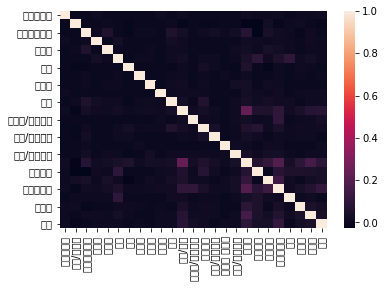

In [ ]:
import seaborn as sns
df2_cor = df2.corr()
sns.heatmap(df2_cor)